In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 24 14:29:31 2022

@author: samy
"""

import shap
from shap.plots import waterfall, beeswarm


import time
import copy
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import model_train as mt
from sklearn.tree import DecisionTreeClassifier 

import pickle
import matplotlib.pyplot as plt


from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from transformers import (AdamW, 
                          get_linear_schedule_with_warmup,
                          set_seed)

import shap
from shap.plots import text
from sklearn.metrics import classification_report
import copy

In [5]:
"""
load pickle data file
"""
def load_pickle(path_file):
    with open(path_file, 'rb') as file:
        data = pickle.load(file)
    return data

# ============================== TEST SET ==============================

## ------------------ CONTROVERSY (pelosi) ---------------

In [3]:
p2 = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap by topic (1 C and 1 NC)/shap_temp_TEST_pelosi_10k.pickle'
shap_valuesC, samp_X, samp_y, c1_id_tweet, c1_sample_idx, tweet_c1, outputs, val, samp_X_list = load_pickle(p2)

In [4]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [1] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.92     10001

    accuracy                           0.86     10001
   macro avg       0.50      0.43      0.46     10001
weighted avg       1.00      0.86      0.92     10001

1421 vs 8580


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [10]:
#p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap by topic (1 C and 1 NC)/shap_temp_TEST_messicumple.pickle'
#shap_valuesNC, samp_X, samp_y, c0_id_tweet, c0_sample_idx, tweet_c0, outputs, val, samp_X_list = load_pickle(p)
#f = plt.figure()
#text(shap_valuesNC[c0_sample_idx])

   ---- (BERT) (TEST) (all) mean ----


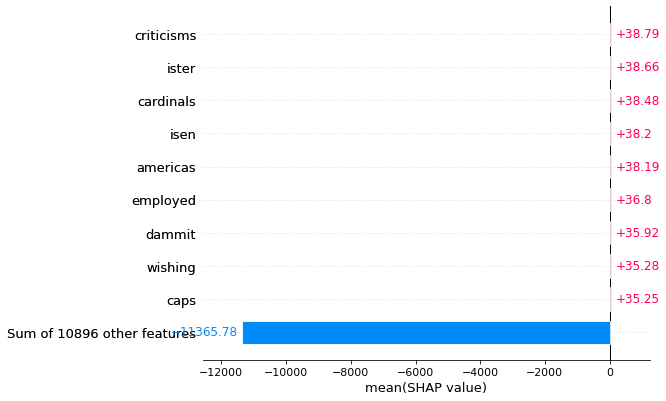

   ---- (BERT) (TEST) (all) min [GOOD] ----


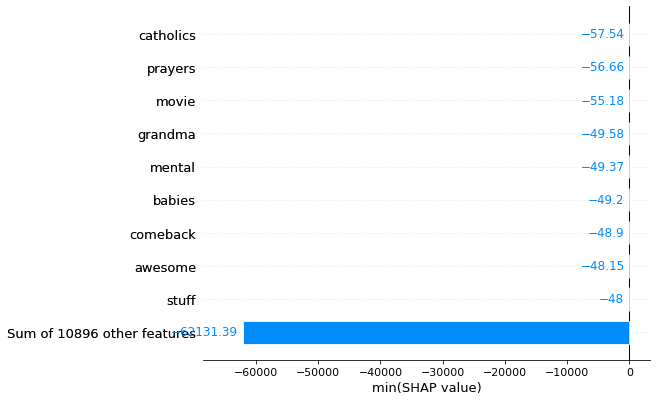

   ---- (BERT) (TEST) (all) max [GOOD] ----


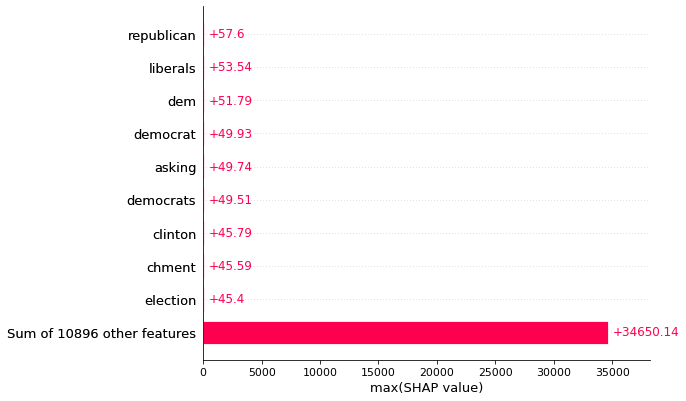

In [33]:
print('   ---- (BERT) (TEST) (all) mean ----')
shap.plots.bar(shap_valuesC.mean(0), order=shap.Explanation.identity)
print('   ---- (BERT) (TEST) (all) min [GOOD] ----')
shap.plots.bar(shap_valuesC.min(0))
print('   ---- (BERT) (TEST) (all) max [GOOD] ----')
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity)

## ------------------ NON-CONTROVERSY (messicumple) ---------------

In [13]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap by topic (1 C and 1 NC)/shap_temp_TEST_messicumple.pickle'
shap_valuesNC, samp_X, samp_y, c0_id_tweet, c0_sample_idx, tweet_c0, outputs, val, samp_X_list = load_pickle(p)

In [14]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [1] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.28      0.43      3001

    accuracy                           0.28      3001
   macro avg       0.50      0.14      0.22      3001
weighted avg       1.00      0.28      0.43      3001

2172 vs 829


   ---- (BERT) (TEST) (all) mean ----


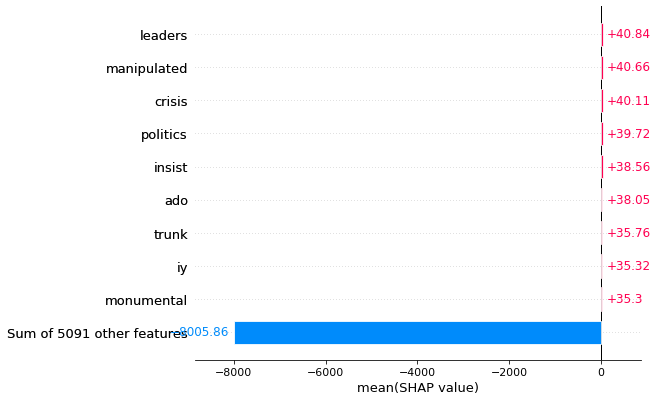

   ---- (BERT) (TEST) (all) min [GOOD] ----


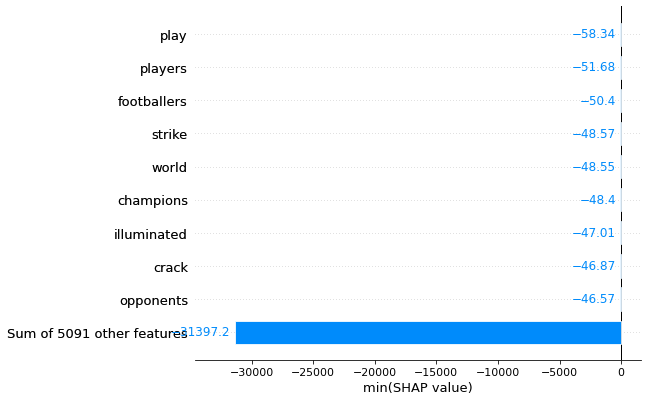

   ---- (BERT) (TEST) (all) max [GOOD] ----


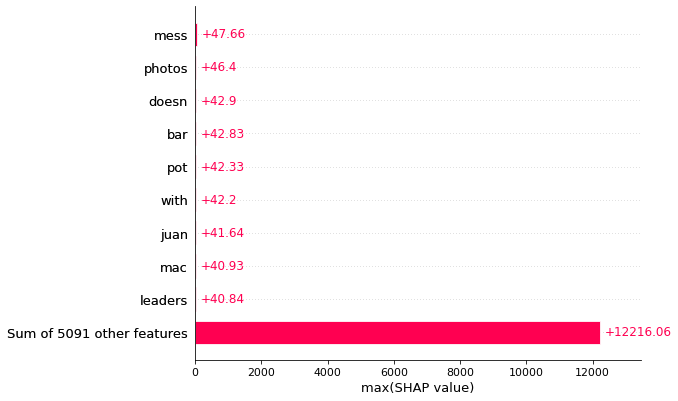

In [18]:
print('   ---- (BERT) (TEST) (all) mean ----')
shap.plots.bar(shap_valuesNC.mean(0), order=shap.Explanation.identity)
print('   ---- (BERT) (TEST) (all) min [GOOD] ----')
shap.plots.bar(shap_valuesNC.min(0))
print('   ---- (BERT) (TEST) (all) max [GOOD] ----')
shap.plots.bar(shap_valuesNC.max(0), order=shap.Explanation.identity)

## ------------------ ALL TOPICS ---------------

# ============================== MANUAL-TEST SET ==============================

## ------------------ CONTROVERSY (pelosi) ---------------

In [6]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap_train_and_manual_test/shap_temp_MANUAL_TEST_pelosi.pickle'
shap_valuesMTEST, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

In [7]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [1] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93       193

    accuracy                           0.87       193
   macro avg       0.50      0.43      0.46       193
weighted avg       1.00      0.87      0.93       193

26 vs 167


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


   ---- (BERT) (MANUAL TEST) (all) mean ----


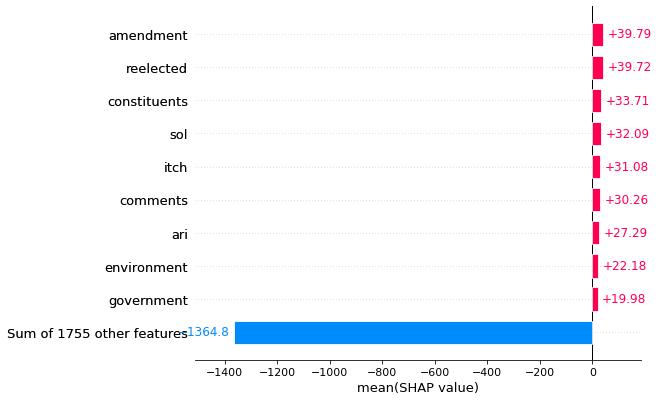

   ---- (BERT) (MANUAL TEST) (all) min [GOOD] ----


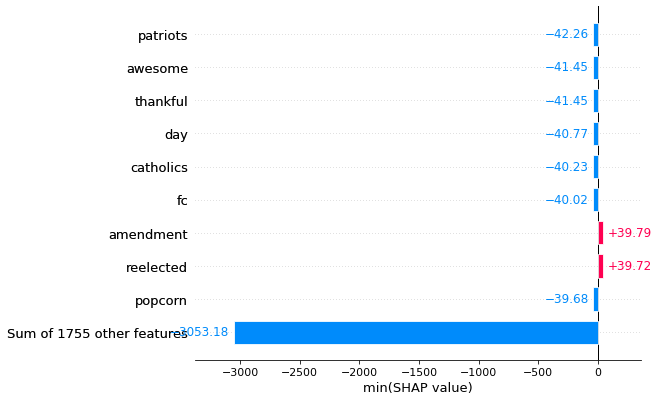

   ---- (BERT) (MANUAL TEST) (all) max [GOOD] ----


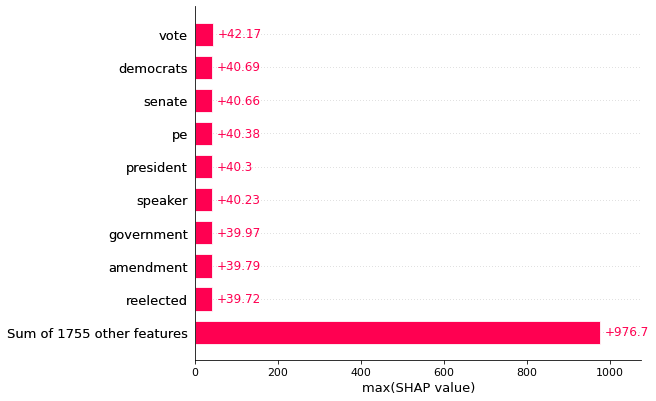

In [9]:
print('   ---- (BERT) (MANUAL TEST) (all) mean ----')
shap.plots.bar(shap_valuesMTEST.mean(0), order=shap.Explanation.identity)
print('   ---- (BERT) (MANUAL TEST) (all) min [GOOD] ----')
shap.plots.bar(shap_valuesMTEST.min(0))
print('   ---- (BERT) (MANUAL TEST) (all) max [GOOD] ----')
shap.plots.bar(shap_valuesMTEST.max(0), order=shap.Explanation.identity)

# ============================== TRAIN SET ==============================

## ------------------ CONTROVERSY (roussef impeachment) ---------------

In [21]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap_train_and_manual_test/shap_temp_TRAIN_impeachment-5-10.pickle'
shap_valuesTRAIN_roussef, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

   ---- (BERT) (TRAIN) (all) mean ----


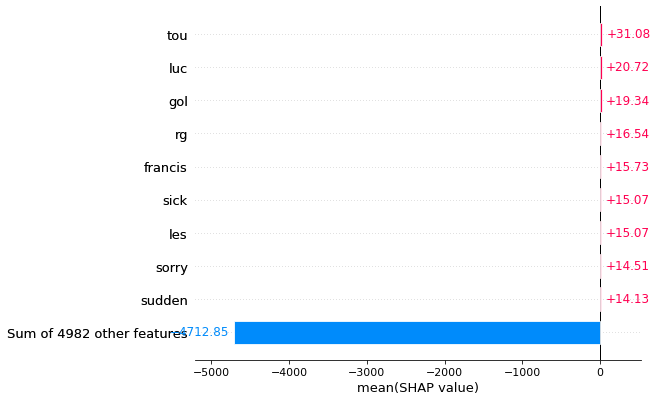

   ---- (BERT) (TRAIN) (all) min [GOOD] ----


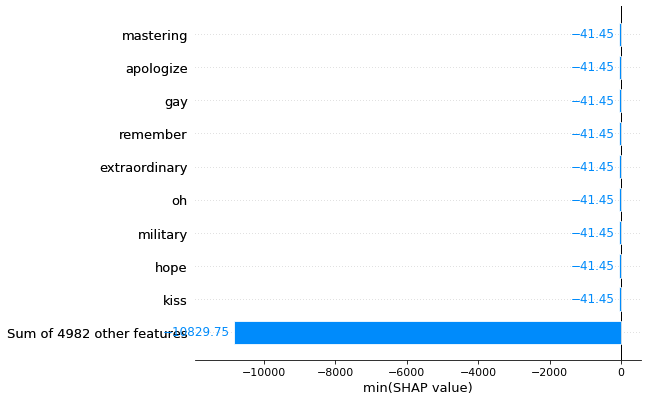

   ---- (BERT) (TRAIN) (all) max [GOOD] ----


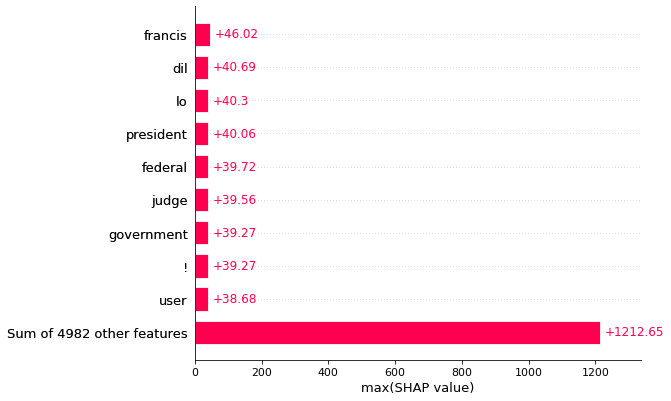

In [27]:
print('   ---- (BERT) (TRAIN) (all) mean ----')
shap.plots.bar(shap_valuesTRAIN_roussef.mean(0), order=shap.Explanation.identity)
print('   ---- (BERT) (TRAIN) (all) min [GOOD] ----')
shap.plots.bar(shap_valuesTRAIN_roussef.min(0))
print('   ---- (BERT) (TRAIN) (all) max [GOOD] ----')
shap.plots.bar(shap_valuesTRAIN_roussef.max(0), order=shap.Explanation.identity)

## ------------------ CONTROVERSY (kavanaugh16) ---------------

In [25]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap_train_and_manual_test/shap_temp_TRAIN_kavanaugh16.pickle'
shap_valuesTRAIN_kav, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

   ---- (BERT) (TRAIN) (all) mean ----


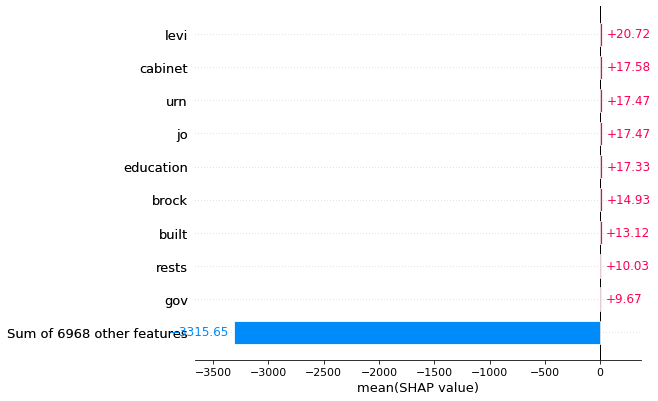

   ---- (BERT) (TRAIN) (all) min [GOOD] ----


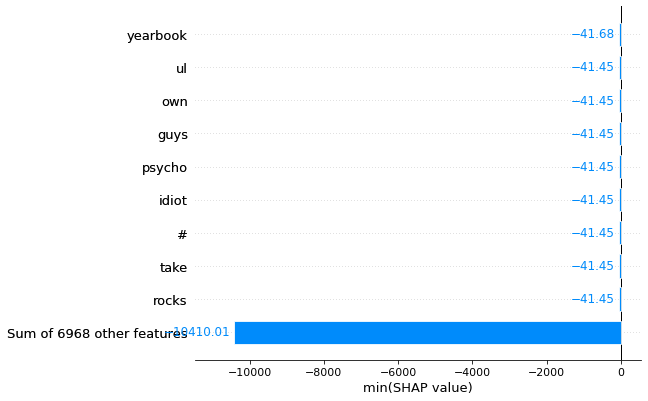

   ---- (BERT) (TRAIN) (all) max [GOOD] ----


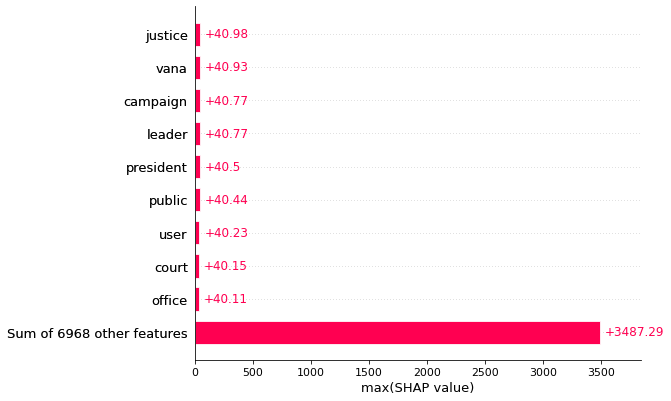

In [26]:
print('   ---- (BERT) (TRAIN) (all) mean ----')
shap.plots.bar(shap_valuesTRAIN_kav.mean(0), order=shap.Explanation.identity)
print('   ---- (BERT) (TRAIN) (all) min [GOOD] ----')
shap.plots.bar(shap_valuesTRAIN_kav.min(0))
print('   ---- (BERT) (TRAIN) (all) max [GOOD] ----')
shap.plots.bar(shap_valuesTRAIN_kav.max(0), order=shap.Explanation.identity)

## ------------------ NON-CONTROVERSY () ---------------

## ------------------ ALL TOPICS ---------------

# ===============================================================================================================

# ============= RF x LIWC ============== 

## -------------- ALL TOPICS - TEST

In [5]:
p = ''
explainer, shap_obj, shap_values, sample_X, sample_y  = load_pickle(p)

In [ ]:
print('   ---- (BERT) (TEST) (RF x LIWC) mean ----') #most common & most impact
# shap.summary_plot(shap_values[0], sample_X, plot_type='bar', title="test_set")
shap.summary_plot(shap_values[0], sample_X, plot_type='violin', title="test_set")

## -------------- ALL TOPICS - TRAIN

In [7]:
p = ''
explainer, shap_obj, shap_values, sample_X, sample_y  = load_pickle5(p)

In [ ]:
print('   ---- (BERT) (TRAIN) (RF x LIWC) mean ----') #most common & most impact
# shap.summary_plot(shap_values[0], sample_X, plot_type='bar', title="test_set")
shap.summary_plot(shap_values[0], sample_X, plot_type='violin', title="test_set")